In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pitch-deck/Uber-Pitch-Deck.pdf


In [2]:
pip install fitz

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install PyMuPDF pillow opencv-python pytesseract


In [4]:
import fitz  # PyMuPDF
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


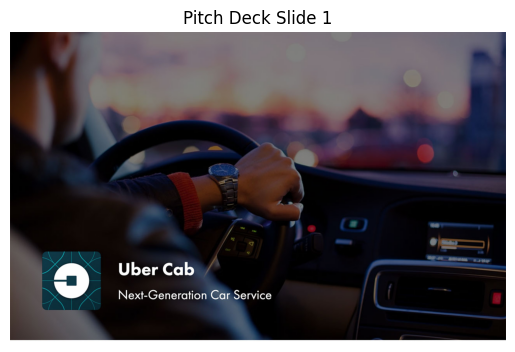

In [5]:
# Path to the PDF
pdf_path = '/kaggle/input/pitch-deck/Uber-Pitch-Deck.pdf'  # Replace with your actual file path

# Open the PDF using PyMuPDF
pdf_document = fitz.open(pdf_path)

# Extract each page as an image
page_number = 0  # Change this if you want to extract a specific page
page = pdf_document.load_page(page_number)  # 0-indexed page number

# Convert the page to an image
pix = page.get_pixmap()
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

# Show the first page as an image
plt.imshow(np.array(img))
plt.title(f'Pitch Deck Slide {page_number + 1}')
plt.axis('off')
plt.show()


In [6]:
# Convert the image to OpenCV format (for text extraction)
img_cv = np.array(img)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

# Use pytesseract to extract text from the slide
extracted_text = pytesseract.image_to_string(img_cv)

# Show the extracted text
print("Extracted Text from the Slide:")
print(extracted_text)


Extracted Text from the Slide:
 



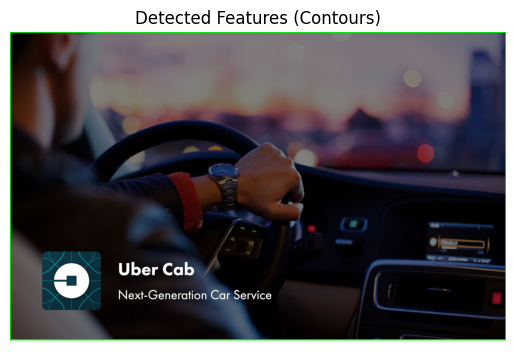

In [7]:
# Convert the image to grayscale for better detection of visual features
gray_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Apply thresholding to highlight potential chart areas
_, thresholded_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
img_with_contours = img_cv.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

# Show the image with contours
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Detected Features (Contours)')
plt.axis('off')
plt.show()



--- Page 1 ---
Extracted Text:
  

Number of Visual Features (Contours) Detected: 1


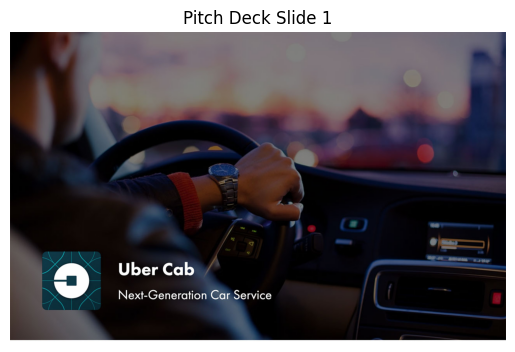


--- Page 2 ---
Extracted Text:
 WH Problem: Cabs in 2008

 

Most use aging & inefficient technology

+ Radio dispatch, no 2-way communication
+ Most common car, Ford Crown Victoria = 14mpg

Hailing is done by hand or phone

* No GPS coordination between client/driver
+ Significant fare-seeking or “dead-time”

Number of Visual Features (Contours) Detected: 1


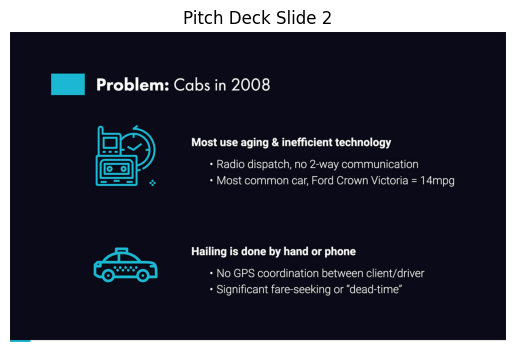


--- Page 3 ---
Extracted Text:
 Problem:
Taxi-monopolies reduce quality of service

e ff:
atl ae
ooU

Medallions are expensive, Medallions cost ~$500k, No incentive/accountability
and drivers underpaid. drivers make 31k for drivers/clients

Digital Hail can now make street hail unnecessary

Number of Visual Features (Contours) Detected: 252


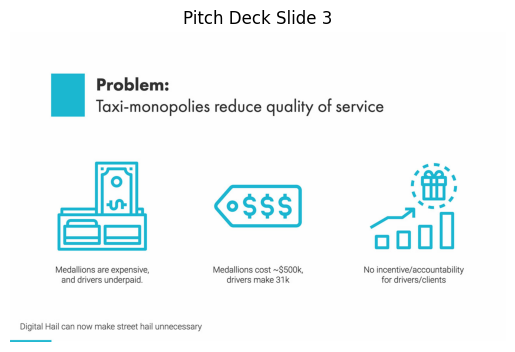


--- Page 4 ---
Extracted Text:
 I Solution: UberCab Concept

- A fast & efficient on-demand
erleoay (eo

+ Market: Professionals in
American cities

* Convenience of a cab in
NYC + experience of a
professional chauffeur. But
in SF and NYC

ta el CKimerela 0 aaa 4
device technology

+ Automate dispatch to
reduce wait-time

* Optimized fleets and
incented drivers

* The “NetJets of car
services”

Number of Visual Features (Contours) Detected: 1


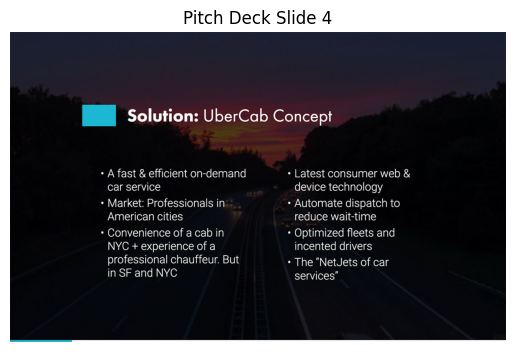


--- Page 5 ---
Extracted Text:
 How it works:
1-Click Car Service

on

US Mut Oy

 

Not hailed from street

RUT al (3 ue
enone Ieh So no medallion licenses
Mvoni Aenea are required, since clients

EIR ax aan] CRASS)
digital-hail

 

COTE B ta Glo)
(unlike a yelloweab) Mobile
lo MMI OMe e-a
driver. See photos of each
other

Number of Visual Features (Contours) Detected: 1


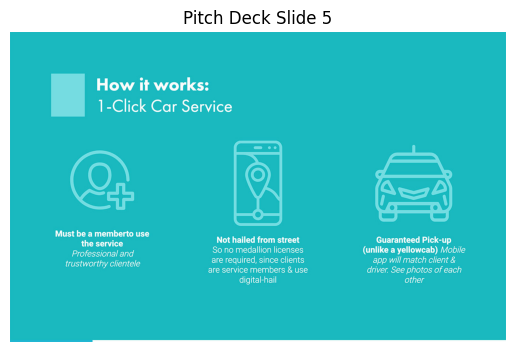


--- Page 6 ---
Extracted Text:
 | Ga ecuiiers

 

BR iets) VT) YTeeeal ie PeytrcRi Clg Fast Response time
“Pickup here in 5 mins” Respectable clientele Logistical LBS software Easier than calling

 

PRT Tara iclui tell |i} High-tech solution: Cell alley
Mercedes Sedans Geo-aware auto-dispatch “Rate your trip” feature

 

Number of Visual Features (Contours) Detected: 182


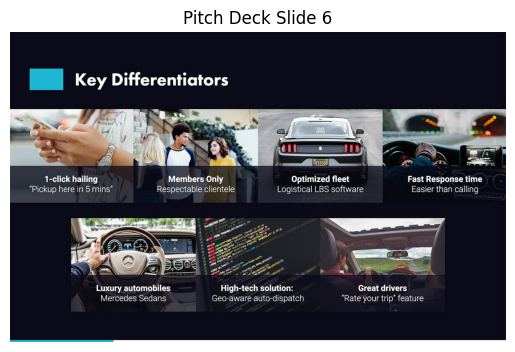


--- Page 7 ---
Extracted Text:
  

 

Operating
Principles

+ Luxury service on-demand
+ Modern and fuel-efficient fleet

* Customer-focused, computer-
coordinated

+ The best end-user experience
possible

+ Statistically optimized response
time

+ Pre-paid, cashless billing system

+ Profitable by design

Number of Visual Features (Contours) Detected: 281


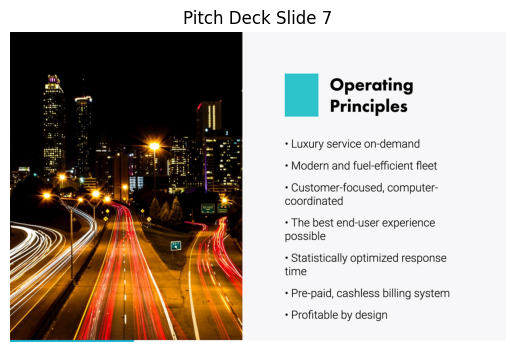


--- Page 8 ---
Extracted Text:
 Product:
UberCab apps

 

 

+ 1-Click request from Geo-aware devices
+ SMS from any phone: “pickup @work in 5”

Number of Visual Features (Contours) Detected: 136


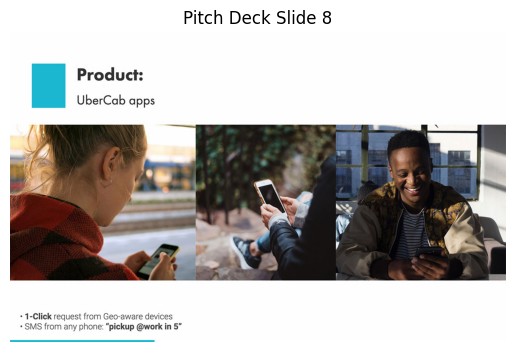


--- Page 9 ---
Extracted Text:
 im Product: UberCab.com

+ Book Trips, show Fleet
status, trip history

+ Pre-specify locations
with labels + coordinates
to enable easy texting of
pickup location

* Google Maps integration:
Lat/long for “home”,

“pob-work’, “alice-apt”

while you ride

 

CT | Home ——_ZincGym

Number of Visual Features (Contours) Detected: 410


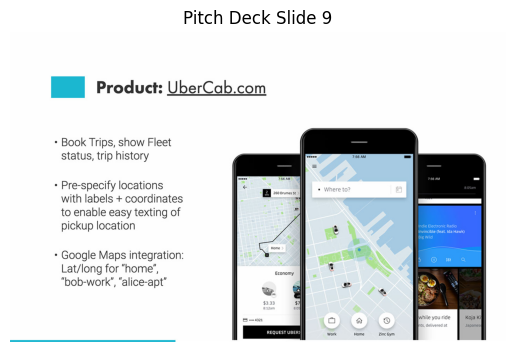


--- Page 10 ---
Extracted Text:
 | Use-Cases

OMe a

 

‘Gee EERW.Y:
s ae OS
y eS, eo,
2: en pL YA\\\Za
Fast local transport Trips to/from A 4 Working while
where parking isn't restaurants, bars & ne SH CefoyaaTantieinen QTL A
easy shows a

cars)

Number of Visual Features (Contours) Detected: 1


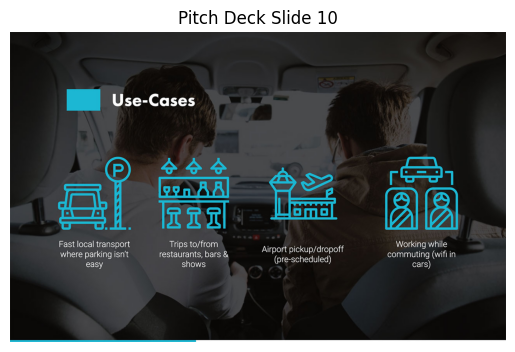


--- Page 11 ---
Extracted Text:
 User
ets

* Cabs don't guarantee pickup, can take 45 mins a

+ Cab aren't as safe or clean as limos @ @
+ Car services require 1-3 hours notice as

* Car services transfers average over $60 + tax

+ UberCab would be faster & cheaper than a
limo, but nicer & safer than a taxicab

 

Number of Visual Features (Contours) Detected: 1


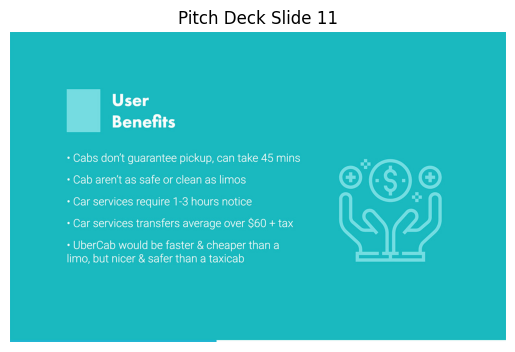


--- Page 12 ---
Extracted Text:
 Go}

 

 

The Park Central Copy Central
San Francisco San Francisco

Contemporary hotel

Travelodge by Wyndham
San Francisco Central
Simple hotel with free

 

   

Central Kitchen
Q Californian cuisine
ina casual setting

Central SF to Start, Manhattan soon after

 

Number of Visual Features (Contours) Detected: 944


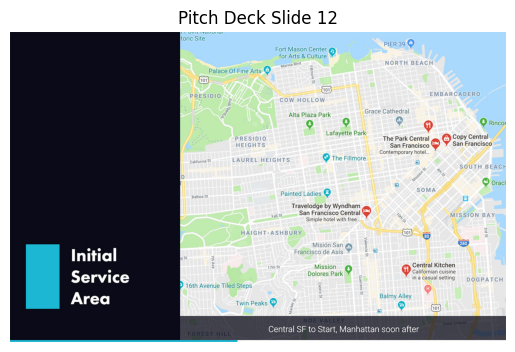


--- Page 13 ---
Extracted Text:
 IN) Technology

| Q

Mobile phones + Payment/utilization Patent-pending
intelligent scheduling /reputation tracking system design

1
-

=O}

Applications for iPhone,
BlackBerry, Symbian
Operations research for
route optimization

Number of Visual Features (Contours) Detected: 223


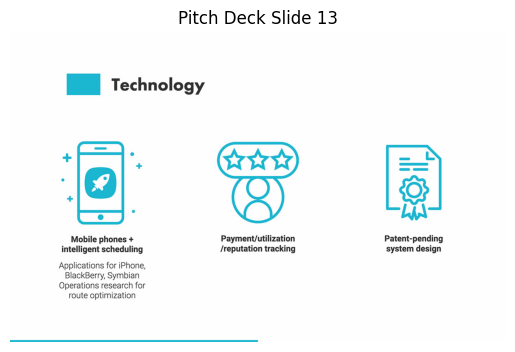


--- Page 14 ---
Extracted Text:
 | Bren bees)

(
5 5 Cars hover in statistically optimized positions
yw

Minimize expected pickup time given hour of week
- i weather/traffic conditions

Number of Visual Features (Contours) Detected: 1


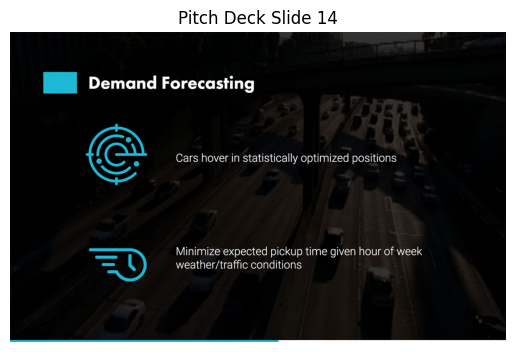


--- Page 15 ---
Extracted Text:
 eerie cy

ils) Vf

of revenues

Annually and growing Top 4 players combined

Number of Visual Features (Contours) Detected: 1


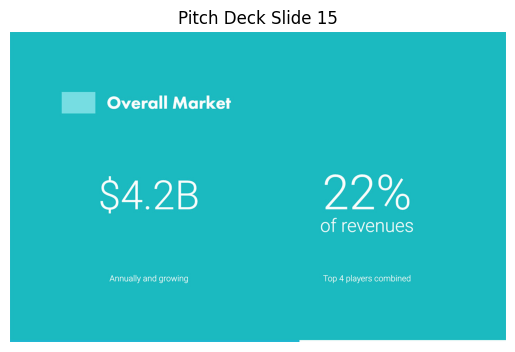


--- Page 16 ---
Extracted Text:
 !)) Composition of Market

 
 
  

Major Market Segments
Business-
airport
trips
Retail-
airport
trips

Business-
non airport Retail-non
trips airport
trips

A
ga

2007 Market

 

Focus on Urban
service on-demand

Number of Visual Features (Contours) Detected: 203


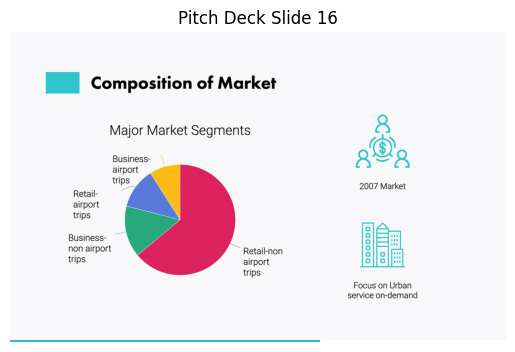


--- Page 17 ---
Extracted Text:
 cree

0b

 

Focus on SF/NYC to begin Expand to LA, Chicago,
Houston, PA, Dallas This covers 50% of entire
US market

Number of Visual Features (Contours) Detected: 1


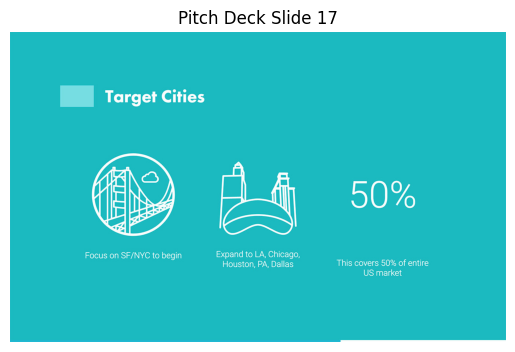


--- Page 18 ---
Extracted Text:
 | BRS tira ranc-ie: aneleulitel RON eelt es

Pon as errr
aN ee a
=
om

Best-Case Scenario: Ptr RS ott RAST TEL) Me

Becomes market leader, Gets 5% of the top 5 US url E] iY ole uy
$1B+ in yearly revenue Cities. Generates 20-30M+ Col esa eA xo ORS ot aia
eae lm CeiI8 V1 (Olmsy- liam Enel sere)

based executives.

 

Number of Visual Features (Contours) Detected: 1


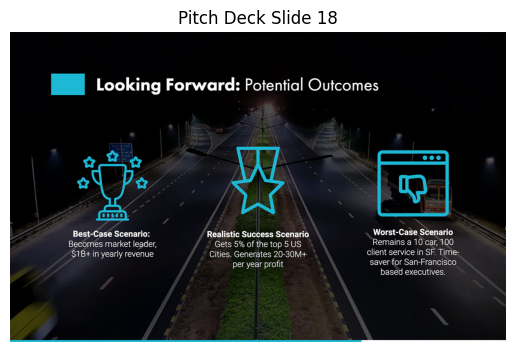


--- Page 19 ---
Extracted Text:
 HB Looking Forward: Location-Based Services

rae $3.5B

Industry Size

Extend infrastructure to other LBS
applications (Delivery, non-critical
medical /governmental use)

Growing to a $3.5B industry by 2010

Number of Visual Features (Contours) Detected: 1


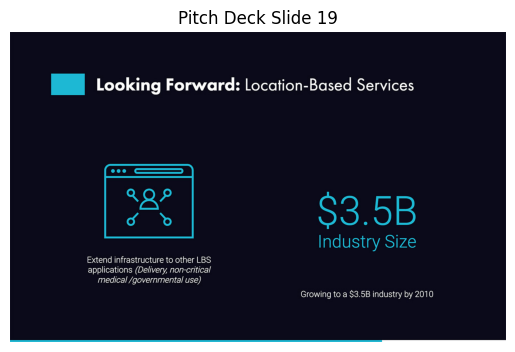


--- Page 20 ---
Extracted Text:
 Quarterly worldwide smartphone sales by OS vendor

1Q-2005 A |

20-2005 I

3Q-2005 A I I

4Q-2005 A 1

\Q-2006 A

2Q-2006 AS Se a

SQ-2006 A

4Q-2006 A as

Q-2007 A

2Q-2007

SQ-2007 A CS
0 25 5 7.5 10 125 15 17.5 20 22.5 25 27.5 30 325 35 37.540

Million units shipped

eSymbian eLinux «Access e Microsoft «RIM e Apple

Number of Visual Features (Contours) Detected: 289


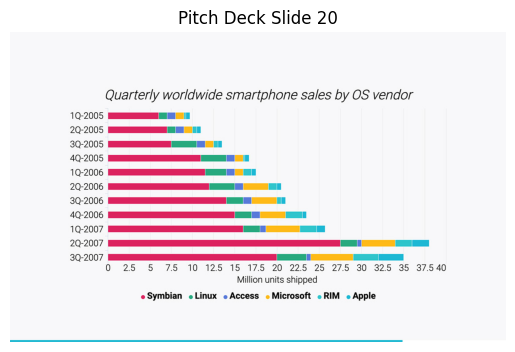


--- Page 21 ---
Extracted Text:
 Percentage

120
110
100
90
80
70
60
50
40
30
20
10

Smartphone sales by OS vendor by region

EMEA Japan China NAm
eSymbian eLinux «Access eRIM e Microsoft « Apple

ROW

Number of Visual Features (Contours) Detected: 159


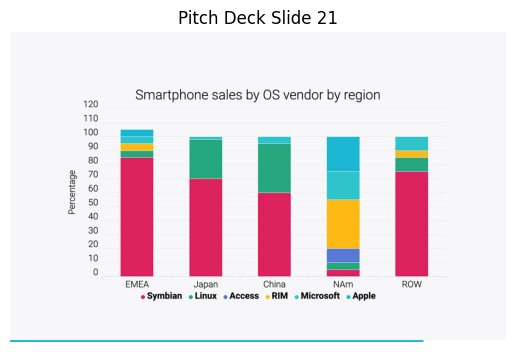


--- Page 22 ---
Extracted Text:
 QO Future Optimizations

 

Lex Ok=1aa110 nance)
demand service

Q
x

More accurate GPS
technology

 

lela a sey erot}
more than “tomorrow
at 5pm”

 

Cheaper cars by buying

used

 

LP)Sefel alee lomo
Sun-Tues multi-hour
bookings

¢ >)

a

Less expensive hybrid
vehicles (Prius)

 

Number of Visual Features (Contours) Detected: 1


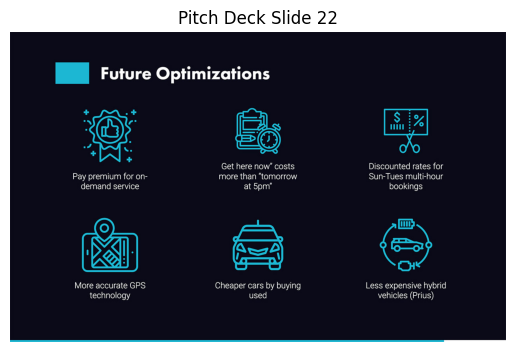


--- Page 23 ---
Extracted Text:
 Go-to Market:
Marketing Ideas
GG ...The One-click cab

... The NetJets of Limos

...Cabs 2.0

Possible slogans

®

Become the ubiquitous Invite Only, referred from
“premium” cab service an existing member

 

Neel aU)
only recognizable brand

Number of Visual Features (Contours) Detected: 40


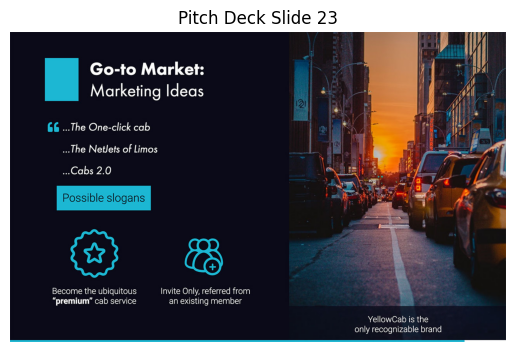


--- Page 24 ---
Extracted Text:
 HO traction: Progress to Date

+ Ubercab.com reserved + “ubercab” SMS code
+ California LLC + trademark filed

+ iPhone dev license applied for Nov28,08

+ Bank Account +Paypal account created

+ 5 advisors & 15 clients now recruited

+ Provisional patent filed

+ NEXT: buy 3 cars, develop“app, Feb1st demo

— Raise a few million; small-office + GM in SF

Number of Visual Features (Contours) Detected: 1


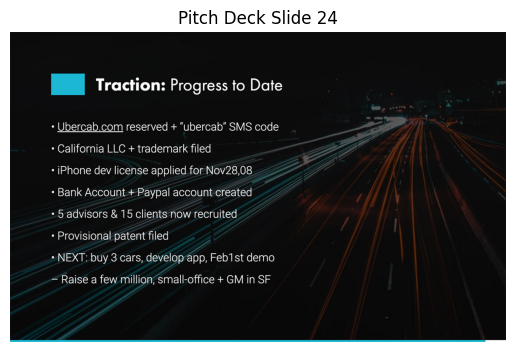

In [8]:
# Loop through all pages in the PDF and extract text and images
for page_number in range(pdf_document.page_count):
    page = pdf_document.load_page(page_number)
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    # Convert to OpenCV format
    img_cv = np.array(img)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    
    # Extract text using pytesseract
    extracted_text = pytesseract.image_to_string(img_cv)
    
    # Detect visual features
    gray_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    _, thresholded_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Display the extracted text and visual feature count
    print(f"\n--- Page {page_number + 1} ---")
    print("Extracted Text:\n", extracted_text)
    print(f"Number of Visual Features (Contours) Detected: {len(contours)}")
    
    # Optionally, display the slide
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title(f'Pitch Deck Slide {page_number + 1}')
    plt.axis('off')
    plt.show()


In [2]:
pip install transformers torch ollama opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import pipeline

# Load GPT-2 model for text generation
generator = pipeline("text-generation", model="gpt2")

financial_statement = """
The company projects $10M revenue next year with a 25% market growth rate.
The target market size is $500M, with 10% expected in 5 years. The company has customer loyalty but faces risks from new entrants.
"""

# Generate analysis using GPT-2
response = generator(f"Analyze the following financial statement: {financial_statement}", max_length=200)
print("GPT-2 Financial Analysis:")
print(response[0]["generated_text"])


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT-2 Financial Analysis:
Analyze the following financial statement: 
The company projects $10M revenue next year with a 25% market growth rate.
The target market size is $500M, with 10% expected in 5 years. The company has customer loyalty but faces risks from new entrants.
The team is focused on customer service and product innovation to develop a product with unique product development and design capabilities and customer retention. The team also is responsible for the design and implementation of the software.
The team consists of engineers, computer scientists, engineers and software engineers with a high level of experience including:
CMS, Programmer, Developer, Programmer Engineer, Developer, Architect and Architectural Engineer
Software Engineer - System Administrator / Software Developer
(Team).
- System Administrator / Software Developer Senior Developer
We are still looking at the cost of the development process but I expect there to be a very successful product later. Our t

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Example investment scoring dataset (dummy values)
X = np.array([[10, 25, 500, 10], [5, 15, 300, 5], [20, 30, 700, 15]])  # [Revenue, Growth, Market Size, Share]
y = np.array([1, 0, 1])  # 1 = Good Investment, 0 = Risky

# Train investment scoring model
model = RandomForestClassifier()
model.fit(X, y)

# Predict for new startup data
new_startup = np.array([[12, 20, 550, 8]])
prediction = model.predict(new_startup)
print("Investment Score:", "Good Investment" if prediction[0] == 1 else "Risky Investment")


Investment Score: Good Investment


In [5]:
feedback_prompt = "Provide feedback for a startup with $12M revenue, 20% growth, $550M market, and 8% share."
response = generator(feedback_prompt, max_length=150)
print("AI Feedback:", response[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


AI Feedback: Provide feedback for a startup with $12M revenue, 20% growth, $550M market, and 8% share. Learn more about our financial disclosures.

V. Launch a platform to raise the next generation of blockchain startups

We've already invested more than $2M in blockchain-powered platforms, and our initial investor was named by VentureBeat's Robert Parry to be a top "100 Startups for 2018." The $6M we've set aside over the next three years is just to secure a secure platform that could prove transformative among blockchain-based platforms.

The key is to get the funding that you need and we don't want to lose it. Our first strategic venture is dedicated to building a platform
